In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
p="/mnt/maimondata01/Max/receptor_directions_buchner71.csv"

In [2]:
dirs=pd.read_csv(p,header=None).to_numpy()

In [4]:
import imageio

In [10]:
imageio.plugins.freeimage.download()

Imageio: 'libfreeimage-3.16.0-linux64.so' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/freeimage/libfreeimage-3.16.0-linux64.so (4.6 MB)
Downloading: 8192/4830080 bytes (0.2%4830080/4830080 bytes (100.0%)
  Done
File saved as /home/maimon/.imageio/freeimage/libfreeimage-3.16.0-linux64.so.


In [56]:
normals[-3:]

array([[-0.44634506, -0.73977163,  0.50350176],
       [-0.92522452, -0.37847782,  0.02672306],
       [-0.42605365, -0.47499236, -0.76997438]])

In [53]:
normals_save=np.zeros((1024,1,3),'float32')
normals_normalized = [normalize_vector(np.array(vec)) for vec in normals]
normals_save[325:,:,:3]=normals[:,None,:]
imageio.imwrite("/mnt/maimondata01/Max/receptor_directions_buchner71.exr",normals_save+1)

In [51]:
normals.shape

(699, 3)

In [26]:
im=imageio.imread("/mnt/maimondata01/Max/receptor_directions_buchner71.exr")

/tmp/ipykernel_28124/1412710854.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im=imageio.imread("/mnt/maimondata01/Max/receptor_directions_buchner71.exr")


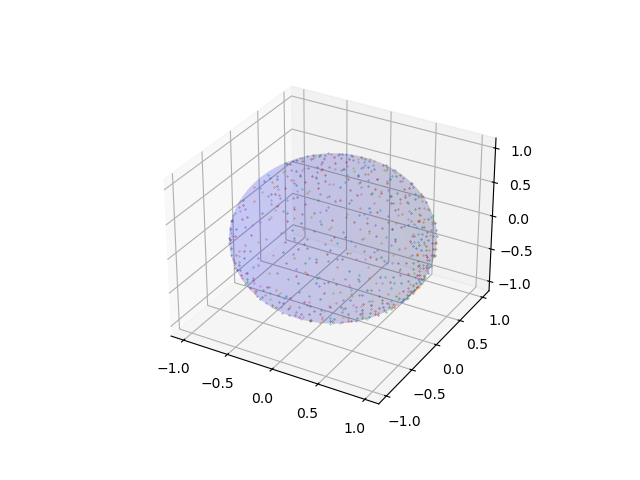

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Function to normalize a vector
def normalize_vector(v):
    norm = np.linalg.norm(v)
    return v / norm if norm else v

# Function to plot and animate the unit sphere with surface normals
def animate_unit_sphere_with_surface_normals(normals):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create a unit sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot the unit sphere
    sphere = ax.plot_surface(x, y, z, color='b', alpha=0.1)

    # Prepare normal vectors for plotting
    normals_normalized = [normalize_vector(np.array(vec)) for vec in normals]

    for vec in normals:
        vec_norm = normalize_vector(vec)
        #ax.quiver(vec_norm[0], vec_norm[1], vec_norm[2], vec_norm[0], vec_norm[1], vec_norm[2], color='r', length=0.2)
        ax.scatter(vec_norm[0], vec_norm[1], vec_norm[2],s=0.1)
    # Animation update function
    def update(frame):
        ax.view_init(elev=90, azim=frame)
        return sphere,

    # Creating animation
    anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50, blit=False)

    plt.show()
    return anim


# Example normal vectors
normals = dirs[::2,:]


# Animate the unit sphere with the normal vectors on the surface
anim = animate_unit_sphere_with_surface_normals(normals)


